<a href="https://colab.research.google.com/github/KhotNoorin/Machine-Learning-/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Noorin Nasir Khot

ID Number: 2024KPAD1007

Objective of K-Nearest Neighbors (KNN):

The objective of KNN is to classify a data point based on the majority class of its nearest neighbors in the feature space. It is a simple, instance-based algorithm often used for classification and regression tasks.

KNN Algorithm:


1.   Choose k: Select the number of neighbors (k) to consider.

2.   Calculate Distances: For a new data point, compute the distance (e.g., Euclidean) to all points in the training dataset.

3.   Find Nearest Neighbors: Identify the k data points with the smallest distances to the new point.

4.   Vote for Class: For classification, assign the class that is most common among the k neighbors. For regression, take the average of the k neighbors' values.

5.   Output Prediction: Return the majority class or average value as the prediction.








Code:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target
target_names = data.target_names

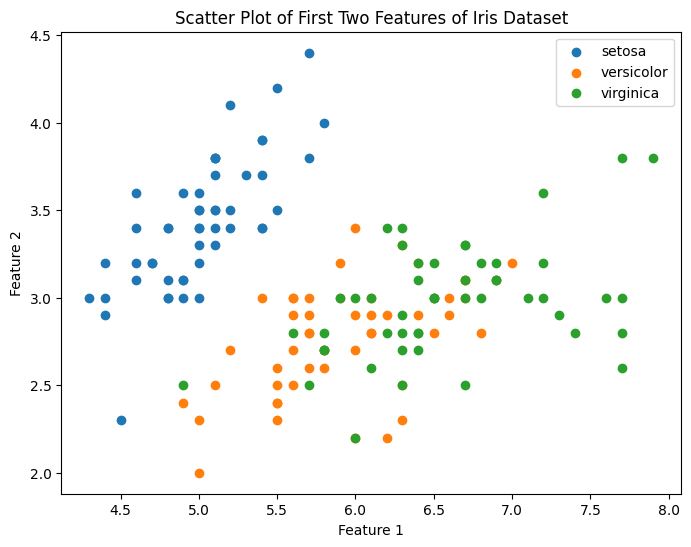

In [ ]:
# Visualize the data (scatter plots for the first two features)
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=target_name)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of First Two Features of Iris Dataset")
plt.legend()
plt.show()

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features (important for distance-based algorithms)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Find the optimal k using cross-validation and GridSearchCV
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)})

In [ ]:
# Get the best k
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k found: {best_k}")

Best k found: 3


In [ ]:
# Train the KNN model with the best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Predict the labels for the test set
y_pred = knn.predict(X_test)

In [ ]:
# Evaluate the model with accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



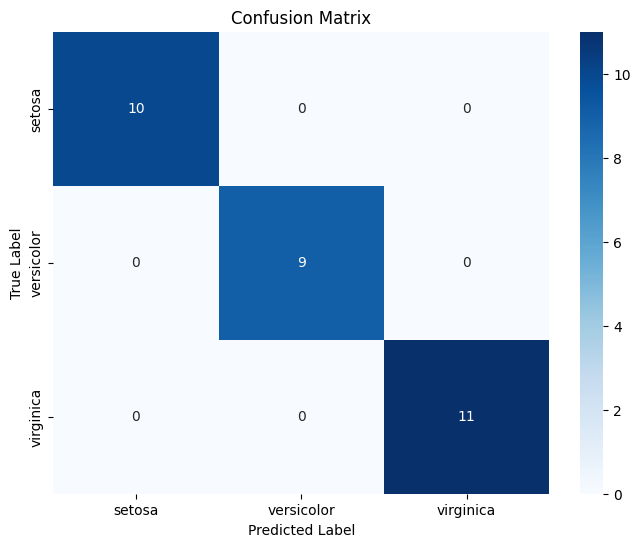

In [ ]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Plotting error rate for different k values
error_rates = []
k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    error = np.mean(y_pred_k != y_test)
    error_rates.append(error)

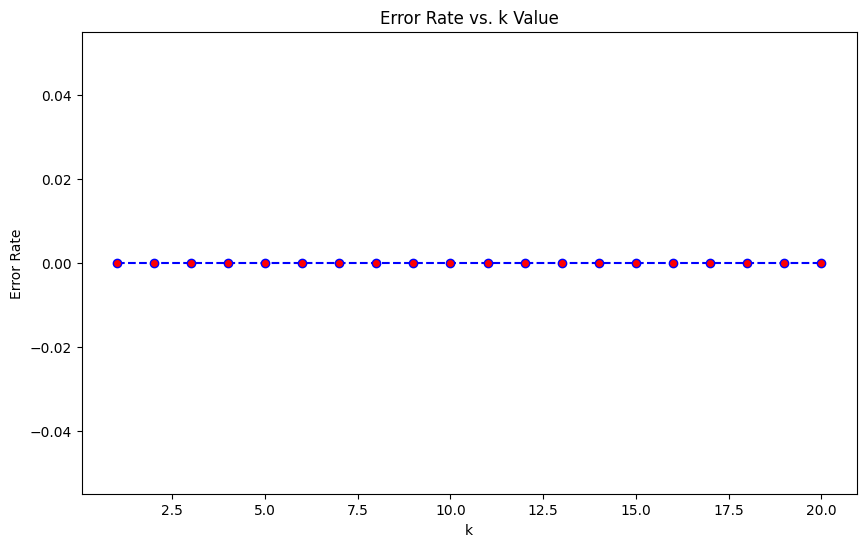

In [ ]:
# Plot error rate vs. k values
plt.figure(figsize=(10, 6))
plt.plot(k_range, error_rates, color='blue', linestyle='dashed', marker='o', markerfacecolor='red')
plt.title('Error Rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
# Cross-Validation Score with the Best K
cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=best_k), X, y, cv=10)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")

Cross-Validation Scores: [1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.93333333 1.         1.         1.        ]
Average Cross-Validation Accuracy: 96.67%
